In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

In [24]:
train_data = pd.read_csv("titanic_train.csv")

In [25]:
test_data = pd.read_csv('titanic_test.csv')

In [26]:
data = pd.concat([train_data,test_data])

In [27]:
cols_to_use = ['Age','Fare','Survived']

data = data[cols_to_use]

In [28]:
data.head()

,Age,Fare,Survived
0,22.0,7.2500,0.0
1,38.0,71.2833,1.0
2,26.0,7.9250,1.0
3,35.0,53.1000,1.0
4,35.0,8.0500,0.0


In [29]:
# Missing values columns

[var for var in data.columns if data[var].isnull().mean() > 0]


## All the columns have the missing data in dataset.

['Age', 'Fare', 'Survived']

In [30]:
data.isnull().mean()*100

Age         20.091673
Fare         0.076394
Survived    31.932773
dtype: float64

In [31]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['Age', 'Fare']],  # predictors
    data['Survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((916, 2), (393, 2))

In [32]:
# Missing data percentage
X_train.isnull().mean()*100

Age     20.196507
Fare     0.109170
dtype: float64

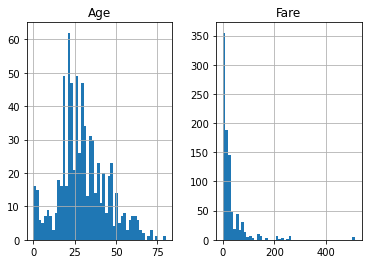

In [33]:
# Let's explore the distribution of the variables
# to decide which arbitrary value to use

X_train.hist(bins=50)
plt.show()

In [34]:
# Replacing NA with -1 and 99 

# first replacing with 99
X_train['Age_99'] = X_train.Age.fillna(99)

# now replacing with -1
X_train['Age_minus1'] = X_train.Age.fillna(-1)

X_train.head(15)

,Age,Fare,Age_99,Age_minus1
501,21.0,7.7500,21.0,21.0
588,22.0,8.0500,22.0,22.0
402,21.0,9.8250,21.0,21.0
302,43.0,21.0000,43.0,43.0
686,14.0,39.6875,14.0,14.0
80,6.0,15.2458,6.0,6.0
117,29.0,21.0000,29.0,29.0
540,36.0,71.0000,36.0,36.0
294,24.0,7.8958,24.0,24.0
261,3.0,31.3875,3.0,3.0


In [35]:
X_train.tail(15)

,Age,Fare,Age_99,Age_minus1
174,56.0,30.6958,56.0,56.0
87,NaN,8.0500,99.0,-1.0
551,27.0,26.0000,27.0,27.0
705,39.0,26.0000,39.0,39.0
314,43.0,26.2500,43.0,43.0
600,24.0,27.0000,24.0,24.0
203,8.0,26.0000,8.0,8.0
599,49.0,56.9292,49.0,49.0
277,NaN,0.0000,99.0,-1.0
142,61.0,262.3750,61.0,61.0


In [37]:
print("Original Variable Variance: ", X_train['Age'].var())
print("Original Variable Variance: ", X_train['Age_99'].var())
print("Original Variable Variance: ", X_train['Age_minus1'].var())

Original Variable Variance:  209.3504485152634
Original Variable Variance:  939.1047152822916
Original Variable Variance:  320.34158501765813


The variance is increased in both the cases (99 and -1) compared to Original data.

The effect on the variance will also be driven by the magnitude of the arbitrary value selected by the imputation.

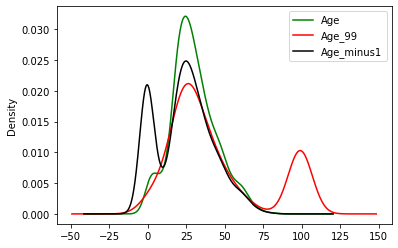

In [52]:
# Plotting the change in distributions

fig = plt.figure()
ax = fig.add_subplot(111)

# Original Data Distribution
X_train['Age'].plot(kind='kde',ax=ax,color='green')

# Variable imputed with 99
X_train['Age_99'].plot(kind='kde',ax=ax,color='red')

# Variable imputed with -1
X_train['Age_minus1'].plot(kind='kde',ax=ax,color='black')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels)
plt.show()

This technique, works quite well with tree-based algorithms.

In [57]:
X_train.cov()

,Age,Fare,Age_99,Age_minus1
Age,209.350449,144.797281,209.350449,209.350449
Fare,144.797281,2653.493063,-69.001073,197.540244
Age_99,209.350449,-69.001073,939.104715,-177.033478
Age_minus1,209.350449,197.540244,-177.033478,320.341585


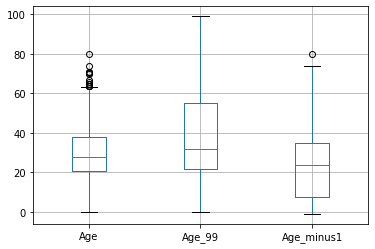

In [61]:
# Arbitrary value imputation may affect the perception of outliers

# Box plot
X_train[['Age','Age_99','Age_minus1']].boxplot()
plt.show()